In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from celluloid import Camera
from tqdm.notebook import tqdm
from random import shuffle
import pylab as pl
from IPython import display
import seaborn as sns

%matplotlib inline
# each animaiton class is made up from the actual sklearn Class
# this way I don't have to recreate the entire implementation
# and I'm able to call things like I'm used to (fit, score, etc.)
# and also I just have to create two new functions -> animate_training
# and plot_decision_boundary
class KNN_animation(KNeighborsClassifier):
    """
    Creates a 2D KNN decision boundary animation with all chosen parameters
    this class is inherted from sklearn, so you may chose whatever you like
    with the init params
    """
    def __init__(self):
        super().__init__() # inheriting from KNeighborsClassifier
        
    
    def plot_decision_boundary(self, x, y, fig, ax, train_size):
        
        cm = plt.cm.RdBu # colormap
        cm_bright = ListedColormap(['#FF0000', '#0000FF']) # cm params
        x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
        y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                                np.arange(y_min, y_max, .05))
        Z = self.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # creating the predicition proba for each spot in meshgrid
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8) # contourplotting
        ax.set_title("{:.3%} of the traning data used".format(len(x)/train_size))
        sns.scatterplot(x[:,0], x[:,1], hue=y, legend=False, palette=['#FF0000', '#0000FF'])

        display.clear_output(wait=True)
        display.display(pl.gcf())
        
    def animate_training(self, x_train, y_train, x_test, y_test):
        """
        This method plots each iteration of the training process
        """
        # just shuffling so that the training is not the same every time you run it
        data = np.c_[x_train, y_train]
        df = pd.DataFrame(data)
        df_shuffled = df.sample(frac=1)
        shuffled_x_train = df[[0, 1]].values
        shuffled_y_train = df[[2]].values.ravel()
        
        # setting up celluloid 
        fig, ax = plt.subplots(figsize=(5,5))
        
        # tqdm makes a progressbar
        for i in tqdm(range(len(x_train))):
            if i <= self.n_neighbors: # it does not make sense to predict if size x_train < k
                pass
            else:
                self.fit(shuffled_x_train[:i+1], shuffled_y_train[:i+1])
                if i % 10 == 0 or i == len(x_train)-1:
                    self.plot_decision_boundary(shuffled_x_train[:i+1], shuffled_y_train[:i+1], fig, ax, len(x_train))
                    #print(self.score(x_test, y_test))
        

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=400, noise=0.70)

#df = pd.DataFrame(dataset.data)
#X = df[[0, 1]].values
#y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(\
                x, y, test_size=0.3, random_state=45)


In [15]:
knn_anim = KNN_animation()

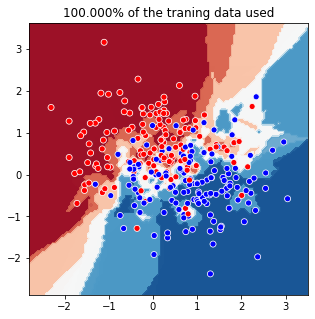

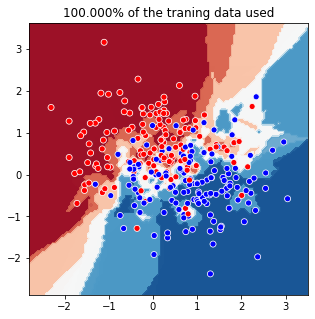

In [16]:
knn_anim.animate_training(x_train, y_train, x_test, y_test)